# Tutorial FFT: De Señal a Frecuencia

## 1. Basic Example

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set seaborn style
sns.set_theme(style="whitegrid")

Creando señales ficticias

In [9]:
fs = 100 # sampling frequency in Hz (muestras por seg tomadas por el sensor)
duration = 2.0 # seconds
t = np.arange(0, duration, 1/fs) # time vector

# signal = sin(2π·3t) + 0.5 sin(2π·7t) + noise
signal = np.sin(2 * np.pi * 3 * t) + 0.5 * np.sin(2 * np.pi * 7 * t) + 0.1 * np.random.randn(len(t))

# Put it into a DataFrame (time-domain view)
df_time = pd.DataFrame({"time": t, "amplitude": signal})
df_time

,time,amplitude
0,0.00,-0.010507
1,0.01,0.579985
2,0.02,0.778062
3,0.03,0.911024
4,0.04,1.154572
...,...,...
195,1.95,-1.096892
196,1.96,-1.283362
197,1.97,-1.219851
198,1.98,-0.716045


Visualizando la senial en el dominio del tiempo

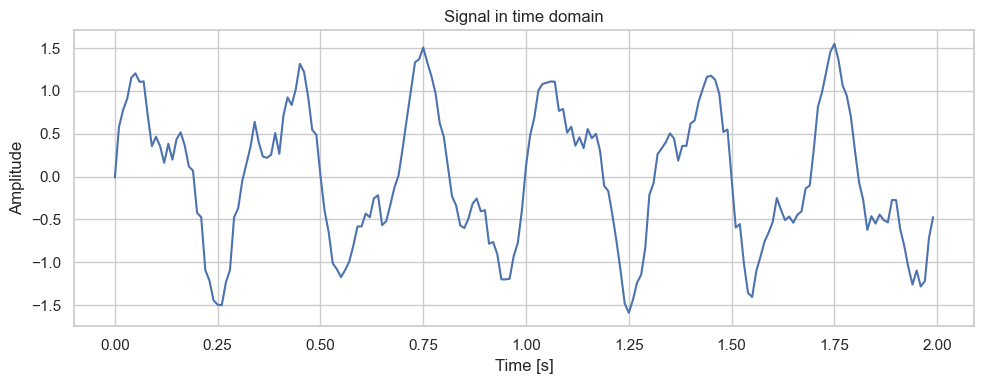

In [10]:
plt.figure(figsize=(10, 4))
sns.lineplot(data=df_time, x="time", y="amplitude")
plt.title("Signal in time domain")
plt.xlabel("Time [s]")
plt.ylabel("Amplitude")
plt.tight_layout()
plt.show()

Aplicando la FFT

In [11]:
N = len(signal) # number of samples
fft_values = np.fft.fft(signal) # complex spectrum
freqs = np.fft.fftfreq(N, d=1/fs) # frequency axis

# We are interested in the positive freqs only
possitive_mask = freqs > 0
freqs_pos = freqs[possitive_mask]
fft_pos = fft_values[possitive_mask]

# Magnitude (absolute value) of the FFT
magnitude = np.abs(fft_pos)

# Build frequency-domain DataFrame
df_freq = pd.DataFrame({"frequency": freqs_pos, "magnitude": magnitude})
# df_freq = pd.DataFrame({"frequency": freqs, "magnitude": fft_values})

df_freq

,frequency,magnitude
0,0.5,2.787484
1,1.0,0.678575
2,1.5,1.131112
3,2.0,1.378227
4,2.5,0.654478
...,...,...
94,47.5,1.233298
95,48.0,1.416043
96,48.5,1.331615
97,49.0,1.922385


Visualizar el espectro de frecuencia

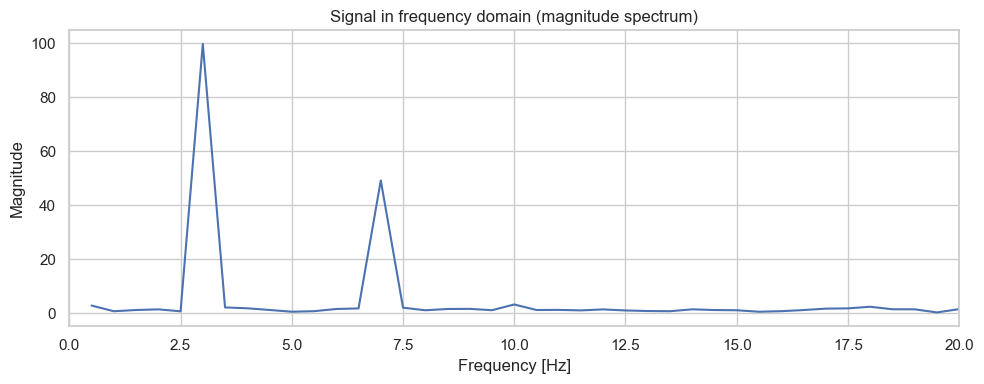

In [12]:
plt.figure(figsize=(10, 4))
sns.lineplot(data=df_freq, x="frequency", y="magnitude")
plt.title("Signal in frequency domain (magnitude spectrum)")
plt.xlabel("Frequency [Hz]")
plt.ylabel("Magnitude")
plt.xlim(0, 20)  # limit frequency range to focus on low frequencies
plt.tight_layout()
plt.show()

## 2. Example with Recording

In [13]:
import sounddevice as sd
from scipy.io import wavfile

In [17]:
# Step 2) Record your voice saying "aaaah" (1–2 seconds)

fs = 16000      # sampling rate (Hz)
duration = 2.0  # seconds

print("Recording... say 'ahhh' now")
audio = sd.rec(int(duration * fs), samplerate=fs, channels=1, dtype="float32")
sd.wait()
audio = audio.squeeze()

print("Done. Audio shape: ", audio.shape)

Recording... say 'ahhh' now
Done. Audio shape:  (32000,)


In [18]:
# Step 3) (Optional) Save to WAV so you can reuse it later 
file_name = "aaaah.wav"
wavfile.write(file_name, fs, (audio * 32767).astype(np.int16))
print(f"Saved: {file_name}")

Saved: aaaah.wav


In [19]:
t = np.arange(len(audio)) / fs 
df_time = pd.DataFrame({
    "time_s": t,
    "amplitude": audio
})
df_time.head()

,time_s,amplitude
0,0.000000,-0.000044
1,0.000063,-0.000041
2,0.000125,-0.000026
3,0.000188,-0.000019
4,0.000250,0.000041


In [ ]:
# Step 5) Plto time